In [ ]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense # Подключаем класс Dense - полносвязный слой
from tensorflow.keras.optimizers import Adam # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
import numpy as np # Подключаем библиотеку numpy
import pylab # Модуль для построения графиков
from mpl_toolkits.mplot3d import Axes3D # Модуль для трехмерной графики
from google.colab import files #Для загрузки своей картинки
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline 
from tensorflow.keras.models import save_model, load_model


In [ ]:
# Для загрузки данных используем drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#imgf = image.load_img('/content/drive/MyDrive/FotoFour.jpg', target_size=(28,28), color_mode = 'grayscale') # Загружаю картинку

In [ ]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()   # Загрузил данные

In [ ]:
print(x_train_org.shape)
print(x_test_org.shape)

(60000, 28, 28)
(10000, 28, 28)


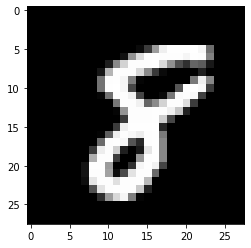

In [ ]:
n = 777  # номер картинки
plt.imshow(Image.fromarray(x_train_org[n]).convert('RGB'))   # отрисовка картинки
plt.show()  # вывод картинки

In [ ]:
y_train_org[n]

8

In [ ]:
x_train = x_train_org.reshape(60000, 784)     # Меняем размер формата входных 
x_test = x_test_org.reshape(10000, 784)       # данных
print(x_train_org.shape)
print(x_train.shape)

(60000, 28, 28)
(60000, 784)


In [ ]:
x_train[0].shape

(784,)

In [ ]:
x_train = x_train.astype('float32')   #Блок нормализации данных входных картинок
x_train = x_train / 255               # На 255 делим, чтобы диапазон был от 0 до
x_test = x_test.astype('float32')     #  1. Т.к. диапазон цвета от 0 до 255
x_test = x_test / 255

In [ ]:
y_train_org[7777]

8

In [ ]:
y_train = utils.to_categorical(y_train_org, 10)   # One hot encoding
y_test = utils.to_categorical(y_test_org, 10)

In [ ]:
x_test .shape

(10000, 784)

In [ ]:
print(y_train[9])  #Пример выходного вектора
print(y_test[9])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
print(y_train_org.shape)
print(y_test_org.shape)

(60000,)
(10000,)


In [ ]:
x_train_new = x_train_org[:50000]
y_train_new = y_train[:50000]                  
x_test_new = x_train_org[50000:]
y_test_new = y_train[50000:]

In [ ]:
print(x_train_new.shape)
print(y_train_new.shape)
print(x_test_new.shape)
print(y_test_new.shape)

(50000, 28, 28)
(50000, 10)
(10000, 28, 28)
(10000, 10)


In [ ]:
x_train_new = x_train_new.reshape(50000, 784)
x_test_new = x_test_new.reshape(10000,784)

In [ ]:
print(x_train_new.shape)
print(y_train_new.shape)
print(x_test_new.shape)
print(y_test_new.shape)

(50000, 784)
(50000, 10)
(10000, 784)
(10000, 10)


In [ ]:
print(y_train_org[99])
print(y_test_org[99])

1
9


In [ ]:
model = Sequential()    #Создаем пустую нейронную сеть
model.add(Dense(800, input_dim = 784, activation='relu'))  #  Полносвязный слой на 800 нейронов
model.add(Dense(400, activation='relu'))   #Полносвязный слой на 400 нейронов
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Компиляция сети
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 800)               628000    
                                                                 
 dense_10 (Dense)            (None, 400)               320400    
                                                                 
 dense_11 (Dense)            (None, 10)                4010      
                                                                 
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(x_train_new, y_train_new, batch_size=196, epochs=20,  validation_data=(x_test_new, y_test_new), verbose=1) # Указываем 10000 случайных примеров для проверочной выборки

Epoch 1/20
256/256 [==============================] - 7s 24ms/step - loss: 3.8303 - accuracy: 0.8909 - val_loss: 0.4483 - val_accuracy: 0.9363
Epoch 2/20
256/256 [==============================] - 6s 24ms/step - loss: 0.2584 - accuracy: 0.9558 - val_loss: 0.3510 - val_accuracy: 0.9438
Epoch 3/20
256/256 [==============================] - 6s 24ms/step - loss: 0.1506 - accuracy: 0.9682 - val_loss: 0.2865 - val_accuracy: 0.9567
Epoch 4/20
256/256 [==============================] - 6s 24ms/step - loss: 0.0971 - accuracy: 0.9777 - val_loss: 0.2714 - val_accuracy: 0.9581
Epoch 5/20
256/256 [==============================] - 6s 25ms/step - loss: 0.0865 - accuracy: 0.9802 - val_loss: 0.2161 - val_accuracy: 0.9658
Epoch 6/20
256/256 [==============================] - 6s 24ms/step - loss: 0.0550 - accuracy: 0.9855 - val_loss: 0.2934 - val_accuracy: 0.9636
Epoch 7/20
256/256 [==============================] - 6s 24ms/step - loss: 0.0790 - accuracy: 0.9829 - val_loss: 0.3337 - val_accuracy: 0.9590

In [ ]:
x_train_new = x_train_org[:10000]
y_train_new = y_train[:10000]                  
x_test_new = x_train_org[10000:]
y_test_new = y_train[10000:]

In [ ]:
print(x_train_new.shape)
print(y_train_new.shape)
print(x_test_new.shape)
print(y_test_new.shape)

(10000, 28, 28)
(10000, 10)
(50000, 28, 28)
(50000, 10)


In [ ]:
x_train_new = x_train_new.reshape(10000, 784)
x_test_new = x_test_new.reshape(50000,784)

In [ ]:
print(x_train_new.shape)
print(y_train_new.shape)
print(x_test_new.shape)
print(y_test_new.shape)

(10000, 784)
(10000, 10)
(50000, 784)
(50000, 10)


In [ ]:
model = Sequential()    #Создаем пустую нейронную сеть
model.add(Dense(800, input_dim = 784, activation='relu'))  #  Полносвязный слой на 800 нейронов
model.add(Dense(400, activation='relu'))   #Полносвязный слой на 400 нейронов
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Компиляция сети
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 800)               628000    
                                                                 
 dense_13 (Dense)            (None, 400)               320400    
                                                                 
 dense_14 (Dense)            (None, 10)                4010      
                                                                 
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(x_train_new, y_train_new, batch_size=196, epochs=20,  validation_data=(x_test_new, y_test_new), verbose=1) 

Epoch 1/20
52/52 [==============================] - 4s 70ms/step - loss: 13.8193 - accuracy: 0.8002 - val_loss: 2.3137 - val_accuracy: 0.9019
Epoch 2/20
52/52 [==============================] - 3s 66ms/step - loss: 1.0223 - accuracy: 0.9358 - val_loss: 1.3935 - val_accuracy: 0.9187
Epoch 3/20
52/52 [==============================] - 3s 65ms/step - loss: 0.3338 - accuracy: 0.9674 - val_loss: 1.2435 - val_accuracy: 0.9259
Epoch 4/20
52/52 [==============================] - 3s 65ms/step - loss: 0.1745 - accuracy: 0.9783 - val_loss: 1.1493 - val_accuracy: 0.9275
Epoch 5/20
52/52 [==============================] - 3s 66ms/step - loss: 0.1015 - accuracy: 0.9858 - val_loss: 1.0755 - val_accuracy: 0.9329
Epoch 6/20
52/52 [==============================] - 3s 66ms/step - loss: 0.1064 - accuracy: 0.9843 - val_loss: 1.1218 - val_accuracy: 0.9331
Epoch 7/20
52/52 [==============================] - 3s 66ms/step - loss: 0.0583 - accuracy: 0.9904 - val_loss: 1.0803 - val_accuracy: 0.9349
Epoch 8/20
5

In [ ]:
x_train_new = x_train_org[:500]
y_train_new = y_train[:500]                  
x_test_new = x_train_org[500:]
y_test_new = y_train[500:]

In [ ]:
print(x_train_new.shape)
print(y_train_new.shape)
print(x_test_new.shape)
print(y_test_new.shape)

(500, 28, 28)
(500, 10)
(59500, 28, 28)
(59500, 10)


In [ ]:
x_train_new = x_train_new.reshape(500, 784)
x_test_new = x_test_new.reshape(59500,784)

In [ ]:
print(x_train_new.shape)
print(y_train_new.shape)
print(x_test_new.shape)
print(y_test_new.shape)

(500, 784)
(500, 10)
(59500, 784)
(59500, 10)


In [ ]:
model = Sequential()    #Создаем пустую нейронную сеть
model.add(Dense(800, input_dim = 784, activation='relu'))  #  Полносвязный слой на 800 нейронов
model.add(Dense(400, activation='relu'))   #Полносвязный слой на 400 нейронов
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Компиляция сети
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 800)               628000    
                                                                 
 dense_16 (Dense)            (None, 400)               320400    
                                                                 
 dense_17 (Dense)            (None, 10)                4010      
                                                                 
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(x_train_new, y_train_new, batch_size=196, epochs=20,  validation_data=(x_test_new, y_test_new), verbose=1) 

Epoch 1/20
3/3 [==============================] - 3s 1s/step - loss: 90.7250 - accuracy: 0.2260 - val_loss: 93.0249 - val_accuracy: 0.4406
Epoch 2/20
3/3 [==============================] - 3s 1s/step - loss: 43.7426 - accuracy: 0.6640 - val_loss: 33.0693 - val_accuracy: 0.6788
Epoch 3/20
3/3 [==============================] - 3s 1s/step - loss: 11.0889 - accuracy: 0.8260 - val_loss: 17.8802 - val_accuracy: 0.7195
Epoch 4/20
3/3 [==============================] - 3s 1s/step - loss: 4.6419 - accuracy: 0.8700 - val_loss: 19.0648 - val_accuracy: 0.6877
Epoch 5/20
3/3 [==============================] - 3s 1s/step - loss: 2.8964 - accuracy: 0.8980 - val_loss: 12.0439 - val_accuracy: 0.7725
Epoch 6/20
3/3 [==============================] - 3s 1s/step - loss: 0.8429 - accuracy: 0.9700 - val_loss: 10.0667 - val_accuracy: 0.7930
Epoch 7/20
3/3 [==============================] - 3s 1s/step - loss: 0.2370 - accuracy: 0.9800 - val_loss: 9.9801 - val_accuracy: 0.7883
Epoch 8/20
3/3 [================

In [ ]:
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization # Основные слои

In [ ]:
model = Sequential()    #Создаем пустую нейронную сеть
model.add(Dense(1200, input_dim = 784, activation='relu'))  #  Полносвязный слой на 1200 нейронов
model.add(Dropout(0.5, input_shape=(784,)))    # 0.5 означает, что 50% нейронов будут 'выключены'
model.add(Dense(300, activation='relu'))   #Полносвязный слой на 300 нейронов
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Компиляция сети
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 1200)              942000    
                                                                 
 dropout (Dropout)           (None, 1200)              0         
                                                                 
 dense_20 (Dense)            (None, 300)               360300    
                                                                 
 dense_21 (Dense)            (None, 10)                3010      
                                                                 
Total params: 1,305,310
Trainable params: 1,305,310
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(x_train_new, y_train_new, batch_size=196, epochs=20,  validation_data=(x_test_new, y_test_new), verbose=1) 

Epoch 1/20
3/3 [==============================] - 4s 2s/step - loss: 126.3423 - accuracy: 0.1500 - val_loss: 63.9914 - val_accuracy: 0.4320
Epoch 2/20
3/3 [==============================] - 3s 2s/step - loss: 49.7309 - accuracy: 0.5660 - val_loss: 16.2812 - val_accuracy: 0.7018
Epoch 3/20
3/3 [==============================] - 3s 2s/step - loss: 13.7139 - accuracy: 0.7720 - val_loss: 20.9398 - val_accuracy: 0.6704
Epoch 4/20
3/3 [==============================] - 3s 2s/step - loss: 9.8290 - accuracy: 0.8020 - val_loss: 16.2975 - val_accuracy: 0.7233
Epoch 5/20
3/3 [==============================] - 4s 2s/step - loss: 7.8198 - accuracy: 0.8340 - val_loss: 11.5559 - val_accuracy: 0.7826
Epoch 6/20
3/3 [==============================] - 3s 2s/step - loss: 5.8544 - accuracy: 0.8620 - val_loss: 9.3705 - val_accuracy: 0.7893
Epoch 7/20
3/3 [==============================] - 3s 2s/step - loss: 3.2361 - accuracy: 0.9160 - val_loss: 9.2475 - val_accuracy: 0.7863
Epoch 8/20
3/3 [================

In [ ]:
model = Sequential()    #Создаем пустую нейронную сеть
model.add(Dense(1200, input_dim = 784, activation='relu'))  #  Полносвязный слой на 1200 нейронов
model.add(Dropout(0.5, input_shape=(784,)))    # 0.5 означает, что 50% нейронов будут 'выключены'
model.add(BatchNormalization(input_shape=(784, )))
model.add(Dense(800, activation='relu'))   #Полносвязный слой на 800 нейронов
model.add(Dropout(0.25, input_shape=(784,)))    # 0.25 означает, что 25% нейронов будут 'выключены'
model.add(BatchNormalization(input_shape=(784, )))
model.add(Dense(400, activation='relu'))   #Полносвязный слой на 400 нейронов
model.add(Dropout(0.25, input_shape=(784,)))    # 0.25 означает, что 25% нейронов будут 'выключены'
model.add(BatchNormalization(input_shape=(784, )))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Компиляция сети
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 1200)              942000    
                                                                 
 dropout_1 (Dropout)         (None, 1200)              0         
                                                                 
 batch_normalization (BatchN  (None, 1200)             4800      
 ormalization)                                                   
                                                                 
 dense_23 (Dense)            (None, 800)               960800    
                                                                 
 dropout_2 (Dropout)         (None, 800)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 800)              3200      
 hNormalization)                                      

In [ ]:
model.fit(x_train_new, y_train_new, batch_size=196, epochs=20,  validation_data=(x_test_new, y_test_new), verbose=1) 

Epoch 1/20
3/3 [==============================] - 7s 3s/step - loss: 2.3130 - accuracy: 0.2920 - val_loss: 2.9147 - val_accuracy: 0.5745
Epoch 2/20
3/3 [==============================] - 6s 3s/step - loss: 0.8532 - accuracy: 0.7360 - val_loss: 2.7711 - val_accuracy: 0.6281
Epoch 3/20
3/3 [==============================] - 6s 3s/step - loss: 0.4966 - accuracy: 0.8320 - val_loss: 2.5701 - val_accuracy: 0.6473
Epoch 4/20
3/3 [==============================] - 6s 3s/step - loss: 0.3161 - accuracy: 0.8940 - val_loss: 2.3921 - val_accuracy: 0.6523
Epoch 5/20
3/3 [==============================] - 6s 3s/step - loss: 0.2430 - accuracy: 0.9400 - val_loss: 2.3113 - val_accuracy: 0.6534
Epoch 6/20
3/3 [==============================] - 6s 3s/step - loss: 0.1388 - accuracy: 0.9640 - val_loss: 2.1714 - val_accuracy: 0.6637
Epoch 7/20
3/3 [==============================] - 6s 3s/step - loss: 0.1472 - accuracy: 0.9600 - val_loss: 1.9774 - val_accuracy: 0.6797
Epoch 8/20
3/3 [=========================